# Estadística Aplicada

## Gpo 44 - Equipo 1

Cinthia Zaydé G. García Belmonte - 2076329

Jocelyn Daniela Ontiveros Lazcano - 1802651

Jesús Eduardo Hernandez Hernandez - 1816700

Martin Esequiel Hernandez Silva - 1847137

Karla Patricia García Carmona - 1448159

# Modelos de Supervivencia

In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.5, 6)

In [ ]:
pip install lifelines

In [ ]:
# Librerias especializadas
from lifelines import CoxPHFitter, KaplanMeierFitter, ExponentialFitter, WeibullFitter, LogNormalFitter

from lifelines.statistics import logrank_test

In [ ]:
# Importar base de datos de Riesgos de Credito del banco
credit_risk = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

## Introducción

Los datos presentan información crucial sobre cada crédito otorgado por un banco, indicando si el cliente ha saldado su deuda, si aún no lo ha hecho, o si está en proceso de pago. El evento de tener el crédito pagado completamente se evalúa a lo largo de un periodo medido en meses.

Las variables más destacables son:

*credito_pagado:* donde 1: el cliente ha pagado completamente el prestamo, 0: el cliente no ha pagado completamente el prestamo

*meses:* tiempo en meses que lleva pagar completamente el prestamo

*cantidad:* monto del prestamo en euros

## Interesados

Consideramos que el análisis y trabajo es valiosa para las entidades financieras y las Sociedades Financieras de Objeto Múltiple (SOFOM), ya que proporcionan información útil para la toma de decisiones al considerar la aprobación de nuevos créditos. Nuestra capacidad para conocer el historial de los solicitantes permite tomar decisiones más informadas y, en última instancia, optar por la mejor decisión posible.

In [ ]:
credit_risk.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


In [ ]:
credit_risk.count()

saldo_cuenta               1000
meses                      1000
historia_crediticia        1000
uso                        1000
cantidad                   1000
saldo_cuenta_ahorro         817
años_trabajando            1000
tasa_de_interes            1000
genero_estado_civil        1000
aval                         52
años_actual_domicilio      1000
activos                    1000
edad                       1000
planes_de_pago              186
casa                       1000
numero_creditos            1000
situacion_laboral          1000
dependientes_economicos    1000
telefono                   1000
extranjero                 1000
credito_pagado             1000
dtype: int64

## Censura

La información proporcionada abarca una variedad de campos, desde la edad hasta el historial crediticio. La base de datos es heterogénea, ya que, al examinarla, se observa que el evento de interés aún no ha tenido lugar. En nuestro caso, dicho evento se refiere a si una persona ha pagado o liquidado completamente su crédito. Esta condición se refleja en la variable "credito_pagado". Cuando esta variable es igual a 1, indica que la persona ha cumplido con el pago de su crédito, mientras que cuando es 0, implica que la persona aún no ha finalizado o continúa pagando el crédito, es decir, que el evento no ha ocurrido. Por lo tanto, afirmamos que la base de datos tiene datos censurados.

In [ ]:
credit_risk['credito_pagado'].unique()

array([1, 0])

## Dummies

In [ ]:
# Ver tipo de variables
credit_risk.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [ ]:
# Dummies para la columna saldo_cuenta
dummies_saldo_cuenta = pd.get_dummies(credit_risk['saldo_cuenta'], prefix='saldo_cuenta').astype('int64')
# Eliminamos la columna saldo_cuenta_sin_cuenta
dummies_saldo_cuenta = dummies_saldo_cuenta.drop('saldo_cuenta_sin_cuenta', axis=1)

In [ ]:
# Dummies para la columna historia_crediticia
dummies_historia_crediticia = pd.get_dummies(credit_risk['historia_crediticia'], prefix='historia_crediticia').astype('int64')
# Eliminamos la columna historia_crediticia_sin_creditos
dummies_historia_crediticia = dummies_historia_crediticia.drop('historia_crediticia_sin_creditos', axis=1)

In [ ]:
# Dummies para la columna uso
dummies_uso = pd.get_dummies(credit_risk['uso'], prefix='uso').astype('int64')
# Eliminamos la columna uso_coche_nuevo
dummies_uso = dummies_uso.drop('uso_coche_nuevo', axis=1)

In [ ]:
# Dummies para la columna saldo_cuenta_ahorro
dummies_saldo_cuenta_ahorro = pd.get_dummies(credit_risk['saldo_cuenta_ahorro'], prefix='saldo_cuenta_ahorro').astype('int64')
# Eliminamos la columna saldo_cuenta_ahorro_menor_100
dummies_saldo_cuenta_ahorro = dummies_saldo_cuenta_ahorro.drop('saldo_cuenta_ahorro_menor_100', axis=1)

In [ ]:
# Dummies para la columna años_trabajando
dummies_años_trabajando = pd.get_dummies(credit_risk['años_trabajando'], prefix='años_trabajando').astype('int64')
# Eliminamos la columna años_trabajando_menor_a_1
dummies_años_trabajando = dummies_años_trabajando.drop('años_trabajando_menor_a_1', axis=1)

In [ ]:
# Dummies para la columna genero_estado_civil
dummies_genero_estado_civil = pd.get_dummies(credit_risk['genero_estado_civil'], prefix='genero_estado_civil').astype('int64')
# Eliminamos la columna genero_estado_civil_mujer_no_soltera
dummies_genero_estado_civil = dummies_genero_estado_civil.drop('genero_estado_civil_mujer_no_soltera', axis=1)

In [ ]:
# Dummies para la columna casa
dummies_casa = pd.get_dummies(credit_risk['casa'], prefix='casa').astype('int64')
# Eliminamos la columna genero_estado_civil_mujer_no_soltera
dummies_casa = dummies_casa.drop('casa_renta', axis=1)

In [ ]:
# Dummies para la columna situacion_laboral
dummies_situacion_laboral = pd.get_dummies(credit_risk['situacion_laboral'], prefix='situacion_laboral').astype('int64')
# Eliminamos la columna genero_estado_civil_mujer_no_soltera
dummies_situacion_laboral = dummies_situacion_laboral.drop('situacion_laboral_desempleado', axis=1)

## Datos missing values o valores repetidos

In [ ]:
##verificar cuantos missing values (valores perdidos)
credit_risk.isnull().sum()

saldo_cuenta                 0
meses                        0
historia_crediticia          0
uso                          0
cantidad                     0
saldo_cuenta_ahorro        183
años_trabajando              0
tasa_de_interes              0
genero_estado_civil          0
aval                       948
años_actual_domicilio        0
activos                      0
edad                         0
planes_de_pago             814
casa                         0
numero_creditos              0
situacion_laboral            0
dependientes_economicos      0
telefono                     0
extranjero                   0
credito_pagado               0
dtype: int64

In [ ]:
credit_risk.duplicated().sum()

0

No hay valores repetidos, sin embargo tenemos 2 columnas que en su mayoria son Missing Values, por lo que no aportan ningun valor y procedemos a eliminarlas de la base

In [ ]:
# Eliminar columnas "aval" y "planes_de_pago"
credit_risk = credit_risk.drop(['aval', 'planes_de_pago'], axis = 1)

In [ ]:
# Eliminar el resto de na
credit_risk = credit_risk.dropna()

In [ ]:
##verificar cuantos missing values (valores perdidos)
credit_risk.isnull().sum()

saldo_cuenta               0
meses                      0
historia_crediticia        0
uso                        0
cantidad                   0
saldo_cuenta_ahorro        0
años_trabajando            0
tasa_de_interes            0
genero_estado_civil        0
años_actual_domicilio      0
activos                    0
edad                       0
casa                       0
numero_creditos            0
situacion_laboral          0
dependientes_economicos    0
telefono                   0
extranjero                 0
credito_pagado             0
dtype: int64

Estadísticas descriptivas

In [ ]:
credit_risk.describe()

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado
count,817.00000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,20.49694,3128.990208,2.963280,2.802938,35.127295,1.411261,1.149327,0.383109,0.963280,0.671971
std,11.84149,2731.688353,1.105301,1.107723,11.348251,0.579275,0.356629,0.486442,0.188188,0.469783
min,4.00000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,12.00000,1355.000000,2.000000,2.000000,26.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,18.00000,2241.000000,3.000000,3.000000,32.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,24.00000,3850.000000,4.000000,4.000000,41.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,72.00000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000


Cuantas variables y cuantas observaciones tienen la base

In [ ]:
numdat=credit_risk.count()

In [ ]:
print('La base de datos tiene 817 observaciones y 19 variables mostradas en:\n', numdat)

La base de datos tiene 817 observaciones y 19 variables mostradas en:
 saldo_cuenta               817
meses                      817
historia_crediticia        817
uso                        817
cantidad                   817
saldo_cuenta_ahorro        817
años_trabajando            817
tasa_de_interes            817
genero_estado_civil        817
años_actual_domicilio      817
activos                    817
edad                       817
casa                       817
numero_creditos            817
situacion_laboral          817
dependientes_economicos    817
telefono                   817
extranjero                 817
credito_pagado             817
dtype: int64


Cuál es el monto promedio de los créditos otorgados por el banco

In [ ]:
credito_monto=credit_risk['cantidad'].mean().round(2)
print('La cantidad promedio de los créditos otorgados por el banco es de: $',credito_monto)

La cantidad promedio de los créditos otorgados por el banco es de: $ 3128.99


Cuál es el tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad

In [ ]:
payed_credit=credit_risk[credit_risk['credito_pagado']==1]

In [ ]:
tiempo_pago=payed_credit['meses'].mean().round(2)
print('Las personas que pagaron su préstamo en su totalidad se tardaron un promedio de: ',tiempo_pago,'meses')

Las personas que pagaron su préstamo en su totalidad se tardaron un promedio de:  18.24 meses


Cuál es la tasa de interés promedio otorgada por el banco

In [ ]:
interes_general=credit_risk['tasa_de_interes'].mean().round(2)
print('La tasa de interés que otorga el banco es de:',interes_general,'%')

La tasa de interés que otorga el banco es de: 2.96 %


Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron

In [ ]:
monto_payed=payed_credit['cantidad'].mean().round(2)
interes_payed=payed_credit['tasa_de_interes'].mean().round(2)
print('El monto promedio de los créditos y la tasa de interés que otorgaron a las personas que ya pagaron sus préstamos es de:$',monto_payed,'y',interes_payed,'%, respectivamente')

El monto promedio de los créditos y la tasa de interés que otorgaron a las personas que ya pagaron sus préstamos es de:$ 2758.71 y 2.9 %, respectivamente


Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado

In [ ]:
unpayed_credit=credit_risk[credit_risk['credito_pagado']==0]

In [ ]:
monto_unpayed=unpayed_credit['cantidad'].mean().round(2)
interes_unpayed=unpayed_credit['tasa_de_interes'].mean().round(2)
print('El monto promedio de los créditos y la tasa de interés que otorgaron a las personas que no han pagado sus préstamos es de:$',monto_unpayed,'y',interes_unpayed,'%, respectivamente')

El monto promedio de los créditos y la tasa de interés que otorgaron a las personas que no han pagado sus préstamos es de:$ 3887.51 y 3.09 %, respectivamente


Tiempo promedio de supervivencia de la base de datos

In [ ]:
sup_general=credit_risk['meses'].mean().round(2)
print('El tiempo promedio de superviviencia de los créditos tramitados es de:',sup_general)

El tiempo promedio de superviviencia de los créditos tramitados es de: 20.5


Calcula la función de supervivencia y grafícala utilizando Kaplan-Meier y obtén la mediana ¿qué significa la mediana?

In [ ]:
credito_KM=KaplanMeierFitter().fit(credit_risk['meses'],credit_risk['credito_pagado'])

In [ ]:
credito_KM.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.993880
5.0,0.992656
6.0,0.924113
7.0,0.920401
8.0,0.912979
9.0,0.877054
10.0,0.853043
11.0,0.841635


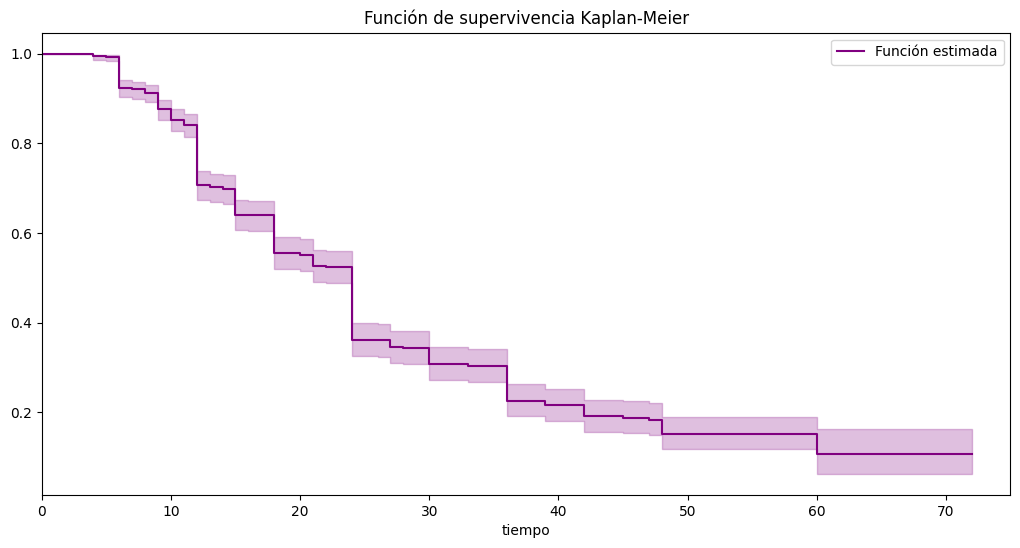

In [ ]:
credito_KM.plot_survival_function(label='Función estimada',color='purple')
plt.title('Función de supervivencia Kaplan-Meier')
plt.xlabel('tiempo')
plt.xlim(0,75);

In [ ]:
tiempo_promedio_KM=credito_KM.median_survival_time_
print('La media del tiempo en que se paga el crédito es de', tiempo_promedio_KM, '. \nEsto significa que son alrededor de 24 meses o 2 años para que suceda el evento de pagar el crédito que se debe. ')

La media del tiempo en que se paga el crédito es de 24.0 . 
Esto significa que son alrededor de 24 meses o 2 años para que suceda el evento de pagar el crédito que se debe. 


Elige construye una variable (por ejemplo, para la del crédito bancario, si debe más de 500 mil 1, y 0 si debe menos), estima y grafica la función de supervivencia por Kaplan-meier para cada grupo

Elegimos la variable de edad en donde existe el siguiente rango:

Si la persona está entre 18 a 30 años = 0

Si la persona está entre 31 a 75 años = 1

In [ ]:
credit_risk["edad_div"] = [1 if edad >= 30 else 0 for edad in credit_risk["edad"]]

In [ ]:
credit_risk.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,años_actual_domicilio,activos,edad,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado,edad_div
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,2,bienes_raices,22,propia,1,gobierno,1,0,1,0,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,3,bienes_raices,49,propia,1,obrero,2,0,1,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,4,seguro_vida,45,prestada,1,gobierno,2,0,1,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,4,sin_activos,53,prestada,2,gobierno,2,0,1,0,1
6,sin_cuenta,24,pago_algun_credito,mobiliario,2835,500_a_1000,mas_de_7,3,hombre_soltero,4,seguro_vida,53,propia,1,gobierno,1,0,1,1,1


In [ ]:
edad_menor=credit_risk[credit_risk['edad_div']==0]
edad_mayor=credit_risk[credit_risk['edad_div']==1]

In [ ]:
edad_menor.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,años_actual_domicilio,activos,edad,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado,edad_div
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,2,bienes_raices,22,propia,1,gobierno,1,0,1,0,0
9,cero_a_200,30,no_ha_pagado,coche_nuevo,5234,menor_100,desempleado,4,hombre_divorciado,2,otro_tipo,28,propia,2,administrativo,1,0,1,0,0
10,cero_a_200,12,pago_algun_credito,coche_nuevo,1295,menor_100,menor_a_1,3,mujer_no_soltera,1,otro_tipo,25,renta,1,gobierno,1,0,1,0,0
11,menor_a_cero,48,pago_algun_credito,poner_negocio,4308,menor_100,menor_a_1,3,mujer_no_soltera,4,seguro_vida,24,renta,1,gobierno,1,0,1,0,0
12,cero_a_200,12,pago_algun_credito,TV,1567,menor_100,1_a_4,1,mujer_no_soltera,1,otro_tipo,22,propia,1,gobierno,1,1,1,1,0


In [ ]:
edad_mayor.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,años_actual_domicilio,activos,edad,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado,edad_div
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,3,bienes_raices,49,propia,1,obrero,2,0,1,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,4,seguro_vida,45,prestada,1,gobierno,2,0,1,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,4,sin_activos,53,prestada,2,gobierno,2,0,1,0,1
6,sin_cuenta,24,pago_algun_credito,mobiliario,2835,500_a_1000,mas_de_7,3,hombre_soltero,4,seguro_vida,53,propia,1,gobierno,1,0,1,1,1
7,cero_a_200,36,pago_algun_credito,coche_usado,6948,menor_100,1_a_4,2,hombre_soltero,2,otro_tipo,35,renta,1,administrativo,1,1,1,1,1


In [ ]:
credito_KM2=KaplanMeierFitter().fit(edad_menor['meses'],edad_menor['edad'])

In [ ]:
credito_KM2.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.996855
6.0,0.930818
8.0,0.924528
9.0,0.855346
10.0,0.842767
11.0,0.836478
12.0,0.647799
13.0,0.638365


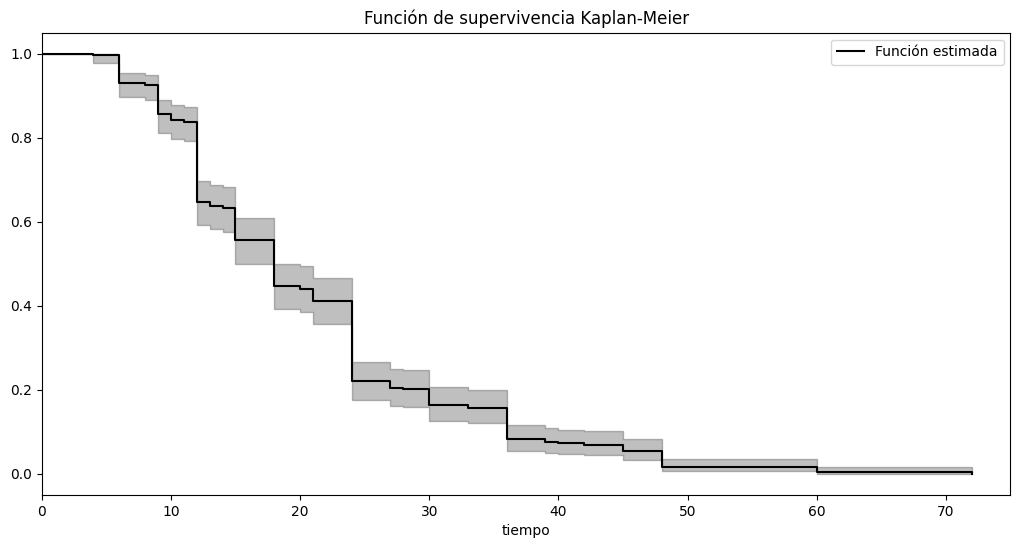

In [ ]:
credito_KM2.plot_survival_function(label='Función estimada',color='black')
plt.title('Función de supervivencia Kaplan-Meier')
plt.xlabel('tiempo')
plt.xlim(0,75);

In [ ]:
credito_KM3=KaplanMeierFitter().fit(edad_mayor['meses'],edad_mayor['edad'])

In [ ]:
credito_KM3.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.991984
5.0,0.989980
6.0,0.903808
7.0,0.897796
8.0,0.887776
9.0,0.845691
10.0,0.811623
11.0,0.797595


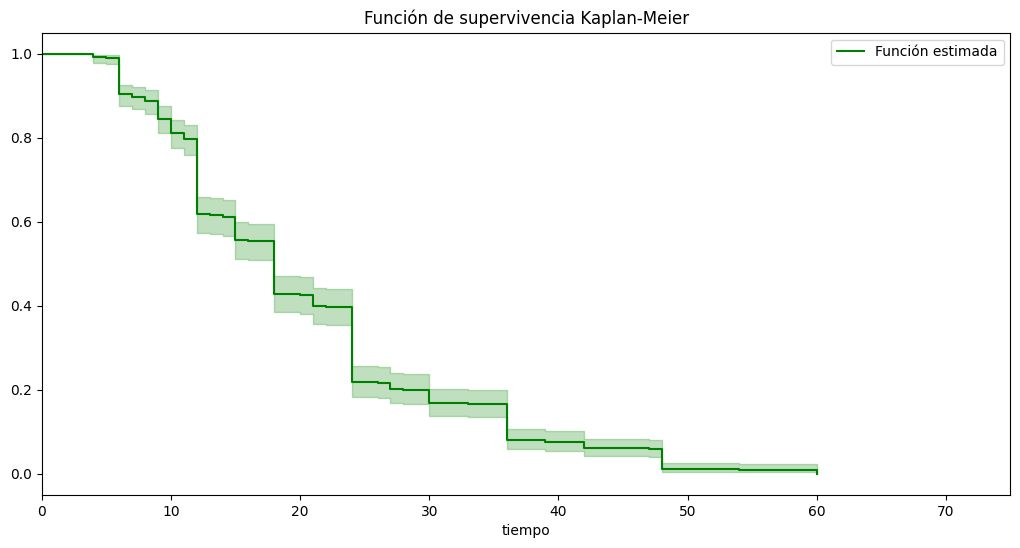

In [ ]:
credito_KM3.plot_survival_function(label='Función estimada',color='green')
plt.title('Función de supervivencia Kaplan-Meier')
plt.xlabel('tiempo')
plt.xlim(0,75);

Para verificar que las funciones de supervivencia son distintas, realizaremos una prueba de hipótesis (log rank test)

log rank test

$H0: S(gpo1)=S(gpo2) $ Funciones de supervivencia idénticas

$Ha: s(gpo1)\neq s(gpo2)  $ Funciones de supervivencia distintas

In [ ]:
## LRT
LRT = logrank_test(edad_mayor['meses'],edad_menor['meses'],edad_mayor['credito_pagado'],edad_menor['credito_pagado'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.02 0.03      5.31

In [ ]:
LRT.p_value.round(2)

0.03

In [ ]:
print('Como p-value = ', LRT.p_value.round(2), '<', 0.05, 'rechazamos Ho, significa que \n las funciones de supervivencia son distintas')

Como p-value =  0.03 < 0.05 rechazamos Ho, significa que 
 las funciones de supervivencia son distintas


In [ ]:
print('La mediana de tiempo de supervivencia de todas las observaciones es:', credito_KM.median_survival_time_)
print('La mediana de tiempo de supervivencia si la persona está entre 18 a 30 años:', credito_KM2.median_survival_time_)
print('La mediana de tiempo de supervivencia si la persona está entre 31 a 75 años:', credito_KM3.median_survival_time_)

La mediana de tiempo de supervivencia de todas las observaciones es: 24.0
La mediana de tiempo de supervivencia si la persona está entre 18 a 30 años: 18.0
La mediana de tiempo de supervivencia si la persona está entre 31 a 75 años: 18.0


Variables elegidas:

tasa_de_interes

cantidad

meses

extranjero

edad

dependientes_economicos

- la variable tasa de interes aumenta mas el riesgo del evento ya que entre mas alta sea la tasa de interes mas se tardan en pagar o lo hace muy dificil de terminar el pago
- La variable cantidad aumenta el riesgo entre mas cantidad pida dependiendo de los ingresos que tenga la persona o el tipo de trabajo/negocio tenga
- la variable meses aumenta el riesgo del evento dependiendo de la responsabilidad de cada persona

- la edad dependiendo de la edad que tenga aumenta o disminuye el riesgo, aumenta si ya que si es muy joven no entiende el sistema de prestamos y si es muy viejo puede que se le olvide o que fallesca disminuye si es un adulto promedio que entiende el sistemas de prestamos

- la variable de dependientes_economicos aumenta el riesgo del evento ya que podría dar prioridad a esos dependientes que al prestamo

- la variable extranjero aumenta o disminuye dependiendo del extranjero, ya que aumenta si regresa a su país y dice ya no volver y no pagar y disminuye si el extranjero no quiere un mal historial crediticio
- la variable numero de creditos disminuye a mayor credito tenga ya que se tiene registro que los anteriores creditos ya han sido pagados

In [74]:
credit_CPHF = credit_risk[['meses', 'edad', 'numero_creditos', 'extranjero', 'dependientes_economicos', 'cantidad', 'tasa_de_interes', 'credito_pagado']]
credit_CPHF

,meses,edad,numero_creditos,extranjero,dependientes_economicos,cantidad,tasa_de_interes,credito_pagado
1,48,22,1,1,1,5951,2,0
2,12,49,1,1,2,2096,2,1
3,42,45,1,1,2,7882,2,1
4,24,53,2,1,2,4870,3,0
6,24,53,1,1,1,2835,3,1
...,...,...,...,...,...,...,...,...
995,12,31,1,1,1,1736,3,1
996,30,40,1,1,1,3857,4,1
997,12,38,1,1,1,804,4,1
998,45,23,1,1,1,1845,4,0


In [75]:
credit_CPHF.isnull().sum()

meses                      0
edad                       0
numero_creditos            0
extranjero                 0
dependientes_economicos    0
cantidad                   0
tasa_de_interes            0
credito_pagado             0
dtype: int64

In [76]:
credit_CPHF.duplicated().sum()

0

In [ ]:
credit_CPHF.dtypes

meses                      int64
edad                       int64
numero_creditos            int64
extranjero                 int64
dependientes_economicos    int64
cantidad                   int64
tasa_de_interes            int64
credito_pagado             int64
dtype: object

In [77]:
CPH = CoxPHFitter()
CPH.fit(credit_CPHF, 'meses', 'credito_pagado')
CPH.print_summary()

<lifelines.CoxPHFitter: fitted with 817 total observations, 268 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 817
number of events observed = 549
   partial log-likelihood = -3083.92
         time fit was run = 2023-11-14 04:07:49 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
edad                      0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
numero_creditos           0.10       1.10       0.08            -0.05             0.25                 0.95                 1.28
extranjero               -1.15       0.32       0.21            -1.56            -0.75                 0.21                 0.47
dependientes_economicos  -0.05       0.95       0.12            -0.29             0.19                 0.75                 1.21
cantidad                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes          -0.40       0.67       0.04            -0.48            -0.32                 0.62                 0.73

                          cmp to      z      p   -log2(p)
covariate                                                
edad                        0.00   3.65 <0.005      11.92
numero_creditos             0.00   1.31   0.19       2.40
extranjero                  0.00  -5.56 <0.005      25.14
dependientes_economicos     0.00  -0.40   0.69       0.53
cantidad                    0.00 -14.27 <0.005     150.97
tasa_de_interes             0.00  -9.83 <0.005      73.35
---
Concordance = 0.78
Partial AIC = 6179.84
log-likelihood ratio test = 364.58 on 6 df
-log2(p) of ll-ratio test = 248.95

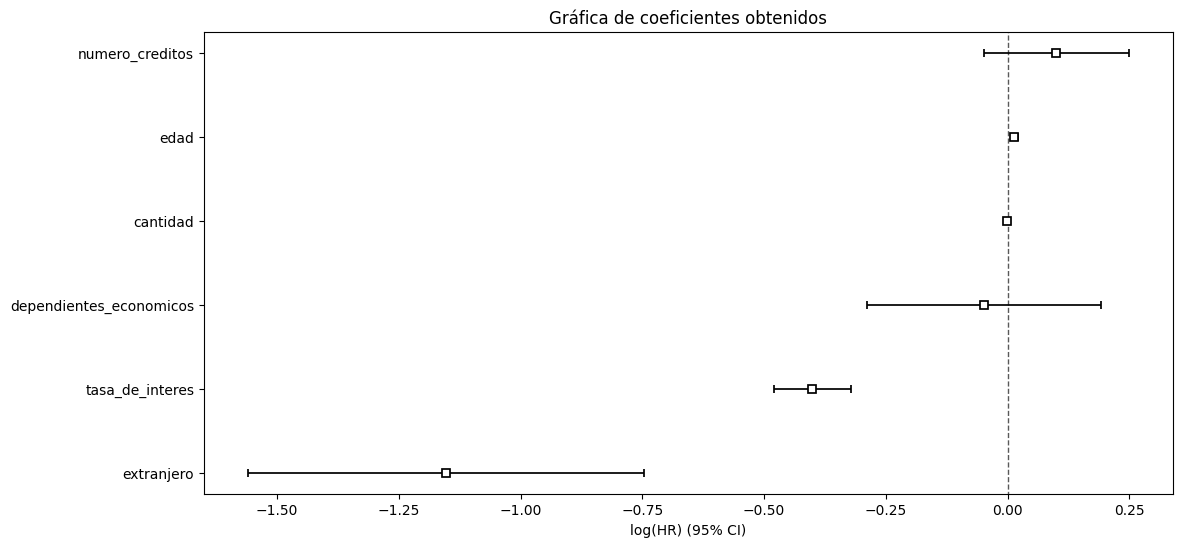

In [78]:
CPH.plot()
plt.title("Gráfica de coeficientes obtenidos")
plt.show();

En el análisis realizado sobre el otorgamiento de los créditos, se observa que las variables edad, extranjero, cantidad, tasa de interes tienen un impacto significativo para que los créditos sean pagados en su totalidad.

El promedio de edad de personas que solicitan el crédito y no pagan es de 24 años, en cambio la edad de promedio de las personas que si pagan el crédito es de 27 años. Los prestamos otorgados a estas personas que no pagan eñ crédito estan por encima de los tres mil, mientras los de las personas que si pagan estan por debajo de tres mil.

De las personas que no pagan el crédito más del 50% solo tiene 1 persona como dependiente económico.

En resumen, el Banco de la Ilusión debería tomar a consideración la capacidad de pago de las personas que solicitan el crédito, tomando en cuenta las variables como la edad y si dependientes económicos, esto para calcular el monto de prestamo apropiado que se adecúe a su capacidad de pago. Así mismo, se debe analizar la tasa de interés que se utilizará para cada crédito ya que se observa que más del 50% de las personas que no pagaron el crédito tenían la tasa más alta.

La desventaja principal del modelo de Kaplan Meier es que da estimaciones poco precisas cuando el número de sujetos es pequeño. En muestras grandes, tiene una importancia fundamental porque influye poco sobre las estimaciones y además permite obtener una función de riesgo.

El modelo de Cox permite calcular el riesgo relativo en función de posibles variables explicativas y asume que, a medida que pasa el tiempo, el riesgo de los dos grupos a comparar varía, pero de forma proporcional el uno con el otro. Esto es una limitación del modelo, ya que no siempre se cumple. Por tanto, antes de aplicar el modelo se debe verificar que efectivamente el riesgo varía de forma proporcional. Al hacer las curvas de KaplanMeier para cada uno de los grupos, si el riesgo varía de forma proporcional, las curvas deben ser paralelas y no cruzarse.